In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [3]:
df = pd.read_csv('winequality-red.csv')
z = np.abs(stats.zscore(df))
threshold = 4 # 3 odchylenia standardowe
wine = df[(z<threshold).all(axis=1)]

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1537 non-null float64
volatile acidity        1537 non-null float64
citric acid             1537 non-null float64
residual sugar          1537 non-null float64
chlorides               1537 non-null float64
free sulfur dioxide     1537 non-null float64
total sulfur dioxide    1537 non-null float64
density                 1537 non-null float64
pH                      1537 non-null float64
sulphates               1537 non-null float64
alcohol                 1537 non-null float64
quality                 1537 non-null int64
dtypes: float64(11), int64(1)
memory usage: 156.1 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,8.300651,0.527245,0.265478,2.426448,0.082483,15.626545,45.491867,0.996699,3.316858,0.645973,10.435296,5.640859
std,1.703428,0.175536,0.191212,0.959717,0.025053,10.011846,31.331473,0.001831,0.147192,0.136686,1.059906,0.808385
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995580,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,61.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,15.000000,1.240000,0.790000,8.100000,0.270000,57.000000,165.000000,1.002890,3.900000,1.220000,14.000000,8.000000


In [7]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
for i in wine.columns:
    print(wine[i].describe())

count    1537.000000
mean        8.300651
std         1.703428
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.000000
Name: fixed acidity, dtype: float64
count    1537.000000
mean        0.527245
std         0.175536
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.240000
Name: volatile acidity, dtype: float64
count    1537.000000
mean        0.265478
std         0.191212
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         0.790000
Name: citric acid, dtype: float64
count    1537.000000
mean        2.426448
std         0.959717
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max         8.100000
Name: residual sugar, dtype: float64
count    1537.000000
mean        0.082483
std         0.025053
min         0.012000
25%         0.070000
50%         0.079000
75%         0.089000
max         0.270000
Name: chloride

[]

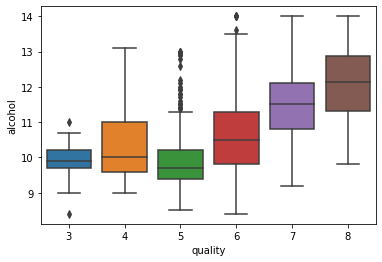

In [9]:
plt.figure()
sns.boxplot(x=wine['quality'], y=wine['alcohol'])
plt.plot()

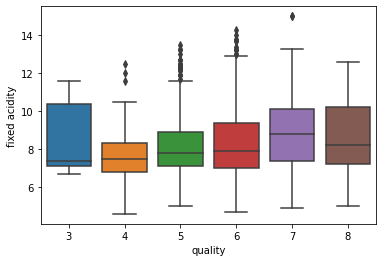

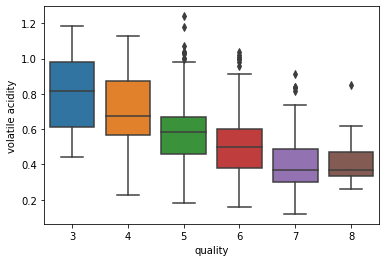

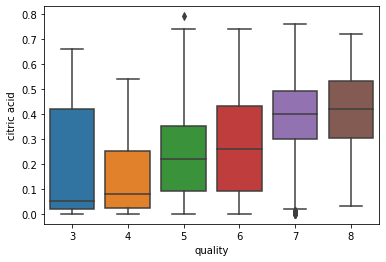

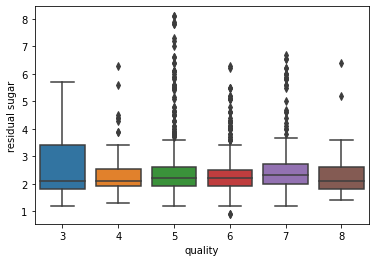

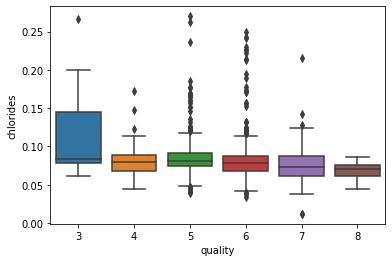

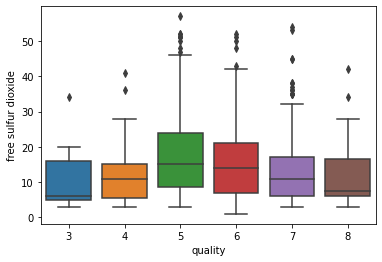

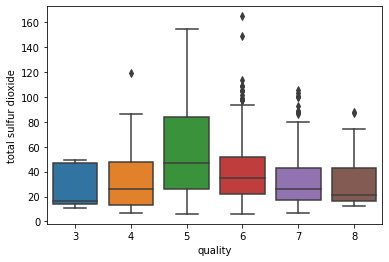

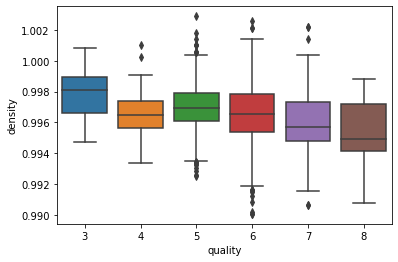

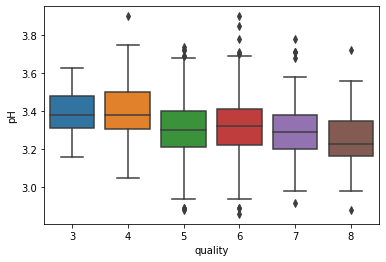

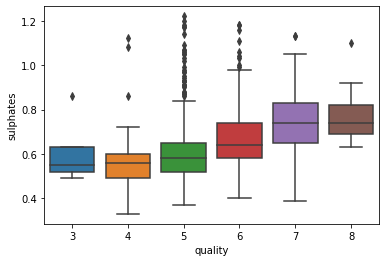

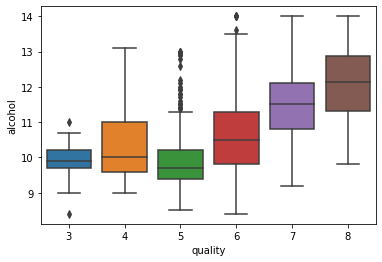

In [10]:
for i in wine.columns[:-1]:
    plt.figure()
    sns.boxplot(x=wine['quality'], y=wine[i])
    plt.plot()

[]

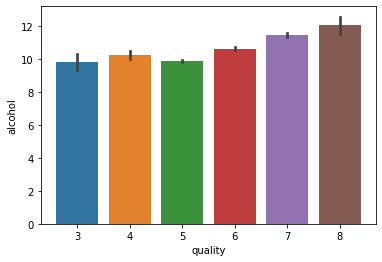

In [11]:
plt.figure()
sns.barplot(x=wine['quality'], y=wine['alcohol'])
plt.plot()

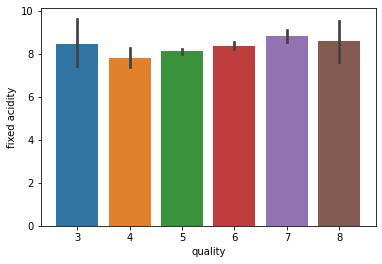

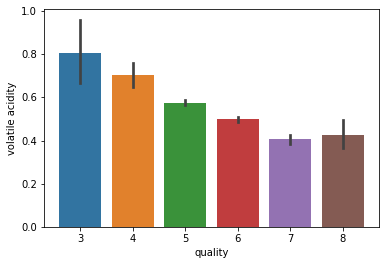

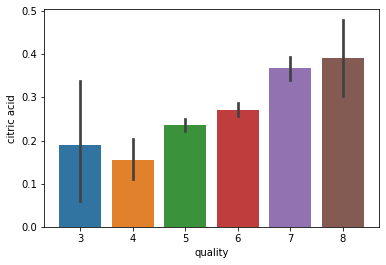

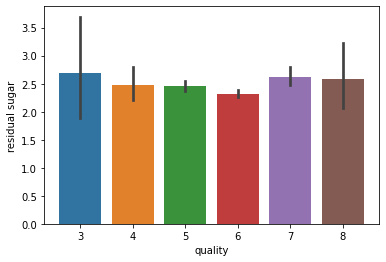

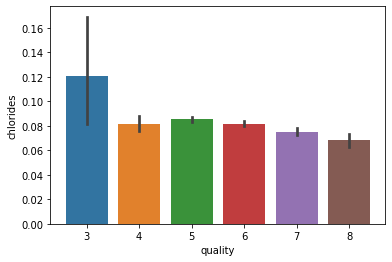

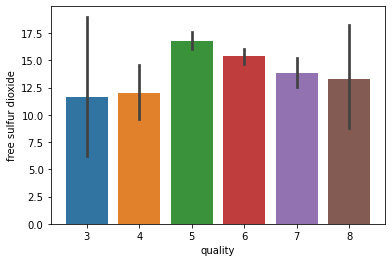

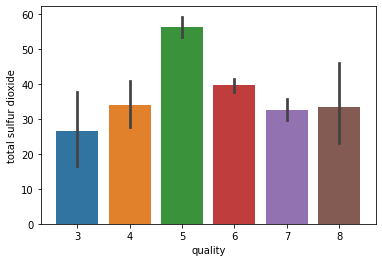

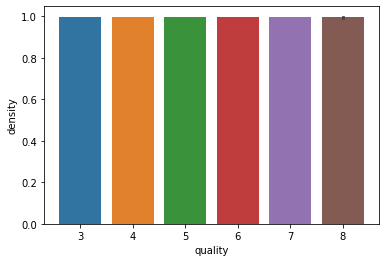

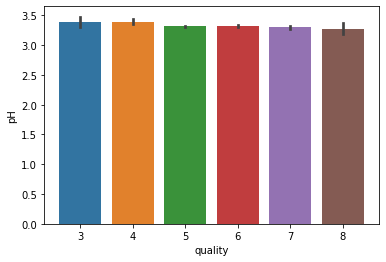

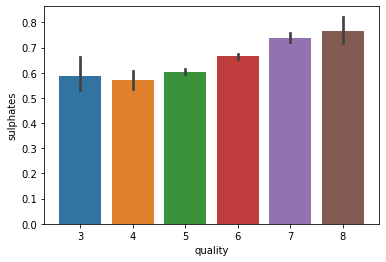

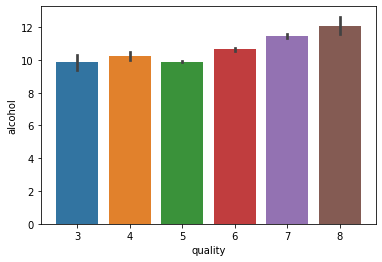

In [12]:
for i in wine.columns[:-1]:
    plt.figure()
    sns.barplot(x=wine['quality'], y=wine[i])
    plt.plot()

In [13]:
corr_matrix = np.corrcoef(wine.values.T)

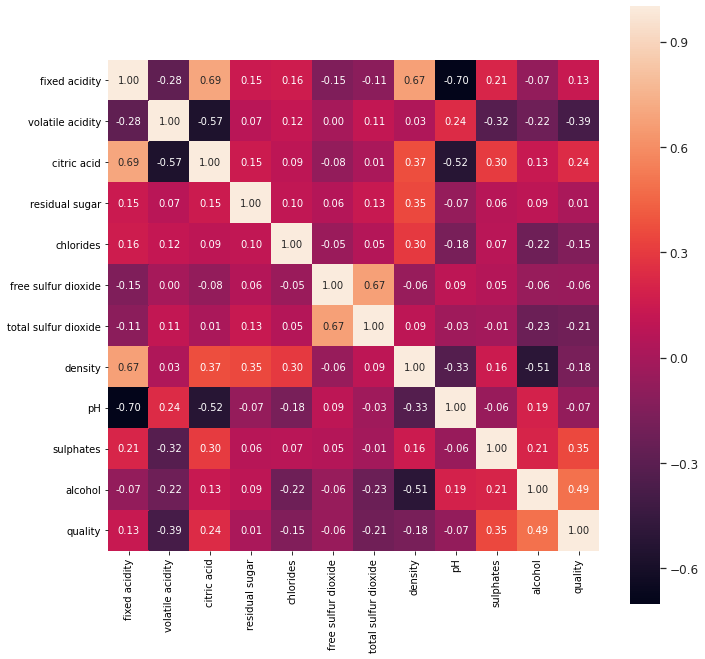

In [14]:
fig, ax = plt.subplots(figsize=(11,11))
sns.set(font_scale = 1.1)
sns.heatmap(data = corr_matrix,
           square = True,
           cbar = True,
           annot = True,
           fmt = '.2f',
           annot_kws = {'size':10},
           xticklabels = wine.columns,
           yticklabels = wine.columns)

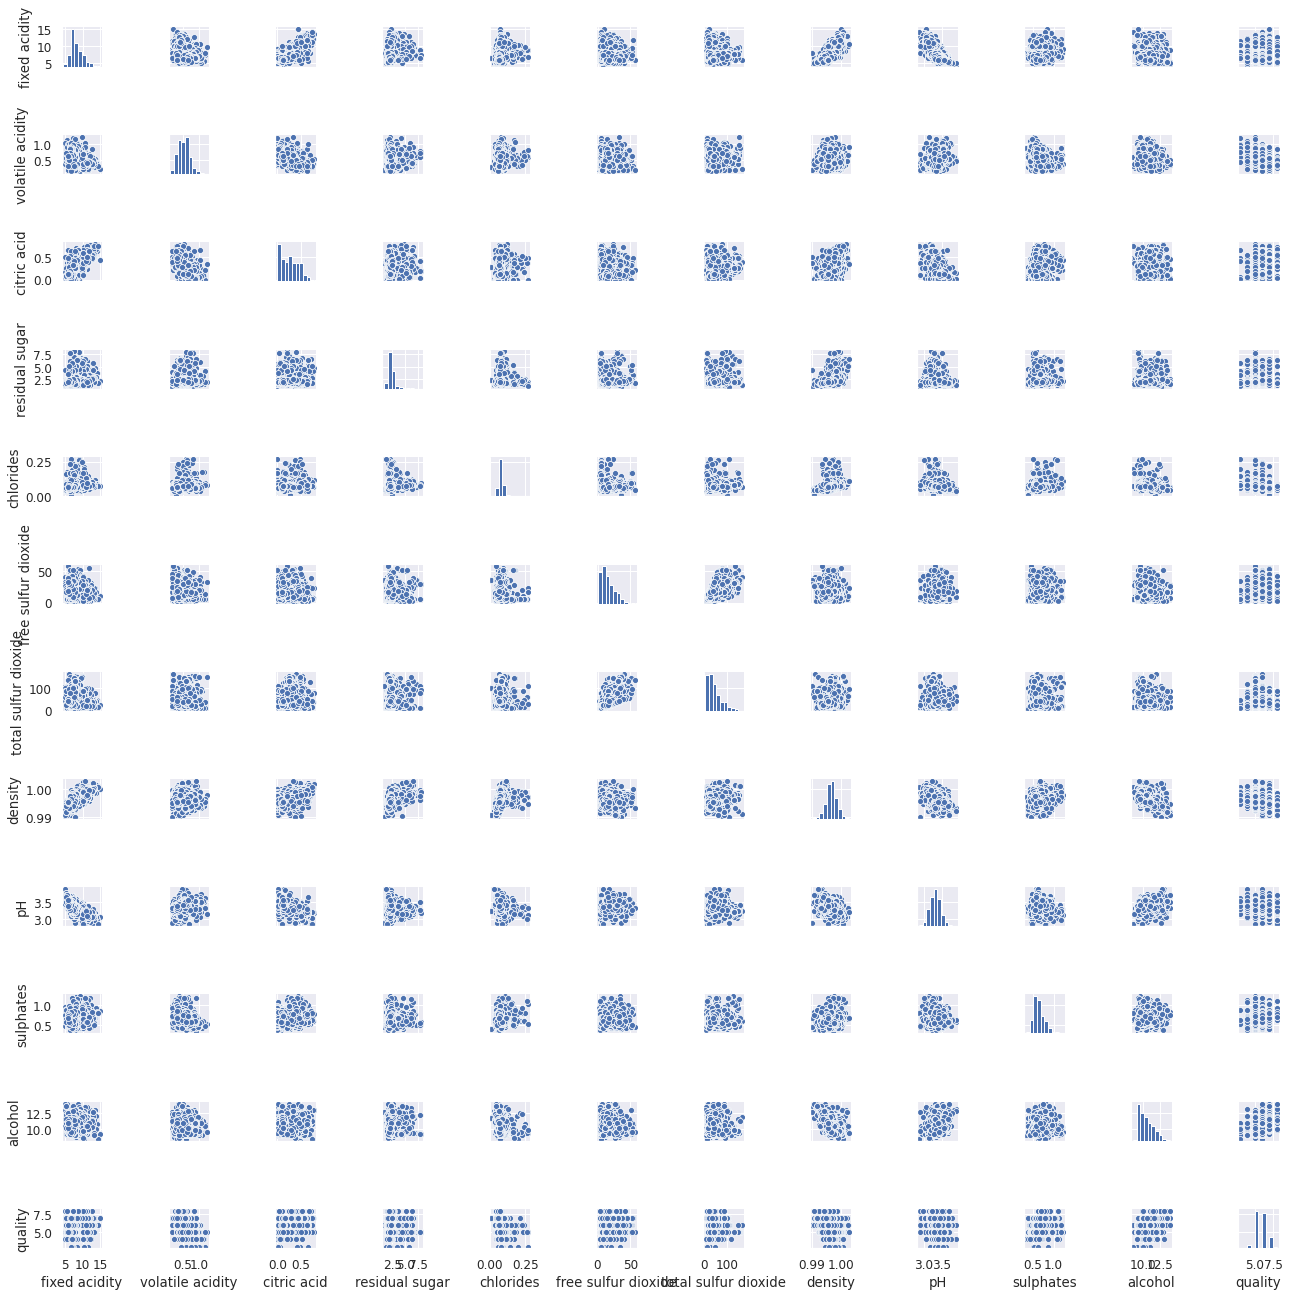

In [15]:
sns.pairplot(wine, height = 1.5)
columns = ['alcohol','volatile acidity', 'sulphates', 'citric acid','total sulfur dioxide', 'density', 'quality' ]



/home/m/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


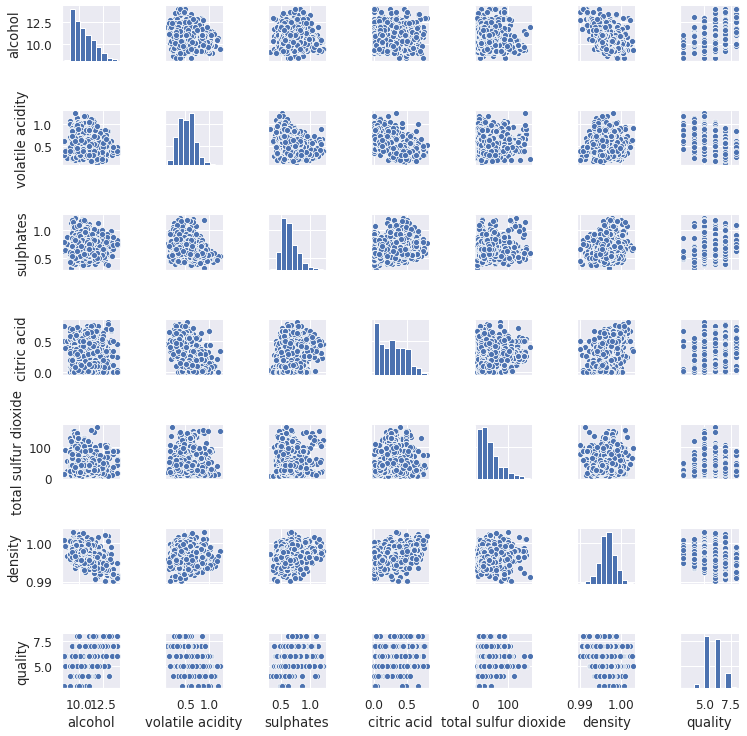

In [16]:
sns.pairplot(wine[columns], size = 1.5)

In [17]:

y=wine['quality'].values
x=wine.iloc[:,0:11].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

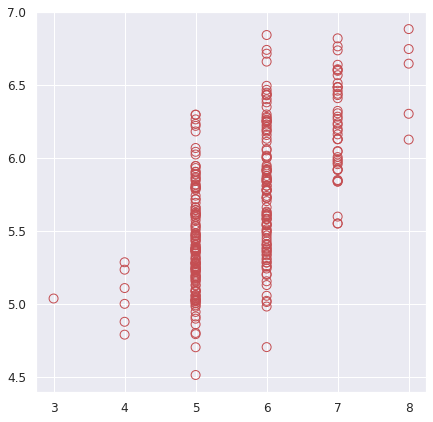

In [18]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, s=80, facecolors='none', edgecolors = 'r')


In [19]:
np.count_nonzero(np.rint(y_pred) == y_test) / len(y_test)  # ile razy uało nam sie poprawnie trafić
 # ponieważ liczby są tez po przecinku, tak zaokrągaląc mamy 

0.564935064935065

In [20]:
round(np.mean(y_test))

6.0

In [21]:
lr.score(x_test, y_test)

0.40256808810161004

In [22]:
good_counter = np.count_nonzero(y_test == np.rint(y_pred))

In [23]:
total_counter = len(y_test)

In [24]:
print(good_counter/total_counter)

0.564935064935065


Regresja logistyczna

In [25]:
clflog = LogisticRegression()
clflog.fit(x, y)


/home/m/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/m/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = clflog.predict(x)

In [27]:
print(clflog.score(x_train, y_train))
print(clflog.score(x_test, y_test))
print(accuracy_score(y_test,clflog.predict(x_test)))

0.6061838893409276
0.5844155844155844
0.5844155844155844


In [28]:
cross_val_score(y_pred, train_x, train_y, cv=5).mean()

NameError: name 'train_x' is not defined

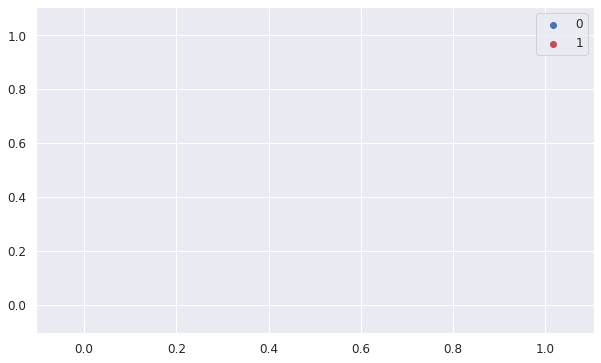

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='1')
plt.legend()


# x1_min, x1_max = x[:,0].min(), x[:,0].max(),
 # x2_min, x2_max = x[:,1].min(), x[:,1].max(),

# xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
# grid = np.concatenate((xx1.ravel().reshape(-1,1), xx2.ravel().reshape(-1,1)),axis=1)

# probs = clflog.predict(grid).reshape(xx1.shape)

#plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')